instalación de paquetes partiendo de un entorno virtual de cero

In [1]:
# !pip install python-dotenv
# !pip install langchain
# !pip install langchain-openai

Importando paquetes necesarios

In [2]:
from dotenv import load_dotenv, find_dotenv
from langchain.chains.summarize import load_summarize_chain
from langchain_openai import ChatOpenAI
from langchain_text_splitters import RecursiveCharacterTextSplitter
import os
from pathlib import Path

# Uso básico: Resumiendo un texto largo

In [3]:
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

In [4]:
ruta_archivo_txt = Path.cwd() / "data/paul_graham_essay.txt"

In [5]:
# Leer el contenido del archivo
with ruta_archivo_txt.open(mode='r', encoding='utf-8') as file:
    contenido = file.read()

## GPT-3.5

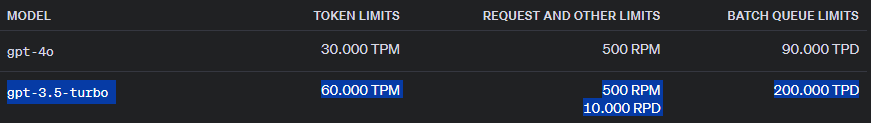


In [49]:
llm = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=openai_api_key, temperature = 0)


In [50]:
# consultando el número de tokens
numero_tokens = llm.get_num_tokens(contenido)
print(f"Hay {numero_tokens} en este texto")

Hay 16534 en este texto


In [51]:
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n"], 
    chunk_size=5000,
    chunk_overlap=350
)

In [52]:
article_chunks = text_splitter.create_documents([contenido])

In [53]:
print(f"Se han creado {len(article_chunks)} chunks del artículo cargado.")

Se han creado 17 chunks del artículo cargado.


In [54]:
chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce"
)

In [55]:
respuesta = chain.invoke(article_chunks)

In [62]:
print(respuesta.get("output_text"))

The author reflects on their journey from studying AI and art to founding an ecommerce software startup in the 90s, which was eventually acquired by Yahoo. They then transitioned to working on a new Lisp dialect and founding Y Combinator, a successful startup funding program. The author also discusses personal challenges, such as their mother's illness, and their passion for writing essays and working on programming projects. They emphasize the importance of pursuing impactful work aligned with one's true motives and the value of independence in rapidly changing fields.


## GPT-4o


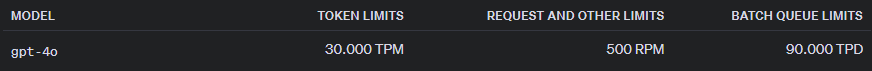

In [42]:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=openai_api_key, temperature = 0)

In [43]:
# consultando el número de tokens
numero_tokens = llm.get_num_tokens(contenido)
print(f"Hay {numero_tokens} en este texto")

Hay 16194 en este texto


In [44]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=80000,
    chunk_overlap=0
)

In [45]:
article_chunks = text_splitter.create_documents([contenido])

In [46]:
print(f"Se han creado {len(article_chunks)} chunks del artículo cargado.")

Se han creado 1 chunks del artículo cargado.


In [47]:
chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce"
)

In [48]:
respuesta = chain.invoke(article_chunks)

In [63]:
print(respuesta.get("output_text"))

The author reflects on their journey from studying AI and art to founding an ecommerce software startup in the 90s, which was eventually acquired by Yahoo. They then transitioned to working on a new Lisp dialect and founding Y Combinator, a successful startup funding program. The author also discusses personal challenges, such as their mother's illness, and their passion for writing essays and working on programming projects. They emphasize the importance of pursuing impactful work aligned with one's true motives and the value of independence in rapidly changing fields.
